<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Challenge" data-toc-modified-id="Challenge-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Challenge</a></span></li><li><span><a href="#Model-Development---Scoping:-Capturing-a-Step-Input-Response" data-toc-modified-id="Model-Development---Scoping:-Capturing-a-Step-Input-Response-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><em>Model Development - Scoping:</em> Capturing a Step Input Response</a></span><ul class="toc-item"><li><span><a href="#Workstation-Motor" data-toc-modified-id="Workstation-Motor-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Workstation Motor</a></span></li><li><span><a href="#Measuring-Motor-Position" data-toc-modified-id="Measuring-Motor-Position-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Measuring Motor Position</a></span></li><li><span><a href="#Reading-the-encoder-module-signal" data-toc-modified-id="Reading-the-encoder-module-signal-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Reading the encoder module signal</a></span></li><li><span><a href="#Measuring-motor-speed" data-toc-modified-id="Measuring-motor-speed-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Measuring motor speed</a></span></li></ul></li><li><span><a href="#Model-Development---Scoping:-Estimate-the-order-of-the-system" data-toc-modified-id="Model-Development---Scoping:-Estimate-the-order-of-the-system-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><em>Model Development - Scoping:</em> Estimate the order of the system</a></span></li><li><span><a href="#Model-Construction:-Parameter-Estimation" data-toc-modified-id="Model-Construction:-Parameter-Estimation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><em>Model Construction:</em> Parameter Estimation</a></span></li><li><span><a href="#Model-Validation:-Change-step-size" data-toc-modified-id="Model-Validation:-Change-step-size-5"><span class="toc-item-num">5&nbsp;&nbsp;</span><em>Model Validation:</em> Change step size</a></span></li><li><span><a href="#Model-Validation:-Start-from-rest" data-toc-modified-id="Model-Validation:-Start-from-rest-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><em>Model Validation:</em> Start from rest</a></span></li><li><span><a href="#Model-Validation:-Low-Resolution-Sensor" data-toc-modified-id="Model-Validation:-Low-Resolution-Sensor-7"><span class="toc-item-num">7&nbsp;&nbsp;</span><em>Model Validation:</em> Low Resolution Sensor</a></span></li><li><span><a href="#Model-Validation:-Coast-Down" data-toc-modified-id="Model-Validation:-Coast-Down-8"><span class="toc-item-num">8&nbsp;&nbsp;</span><em>Model Validation:</em> Coast Down</a></span></li><li><span><a href="#Model-Validation:-Encoder-Resolution-Limits" data-toc-modified-id="Model-Validation:-Encoder-Resolution-Limits-9"><span class="toc-item-num">9&nbsp;&nbsp;</span><em>Model Validation:</em> Encoder Resolution Limits</a></span></li></ul></div>

[IMPLEMENTATION RESOURCES](https://sabatind.github.io/ME480_Resources/)


# Challenge

In this lab, you will get some experience generating a dynamic model of an electric motor. The challenge is to create a validated model of your workstation motor using experimentally collected data that will allow you to *reasonably* predict the motor's output velocity for **any** voltage step input.  

#  *Model Development - Scoping:* Capturing a Step Input Response

We'll begin by identifying the inputs and outputs of the system. As you've already seen in your previous labs, the input to the motor is voltage and the output is angular velocity.

In order to scope the order of the differential equation we would use to model the system, we'll need to record the response of the motor's angular velocity to a step input in voltage.  It will require a few steps to develop this experimental capability.

## Workstation Motor

An exploded view of the Pololu 50:1 gearmotor that will be used for the testing is shown below.  **Find the motor windings, commutator and brushes on the diagram.**

*Consider revisting the material on [DC motors from Lab 1](../Lab_1/Lab_1.ipynb#Model-Development:-DC-Motor) if these terms or concepts are not familiar to you.*

<br>

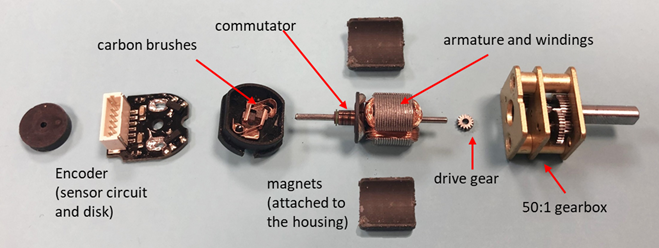

Relevant characteristics of the motor are provided by the [manufacturer](https://www.pololu.com/product/3073/specs).  

**NOTE that your motor has a peak current of 1.5 amps (3 times the nomimal output of a typical USB connection) so the USB cable won't be able to allow us to see the full capability of the motor.  That will be important to properly characterize it. Therefore, we'll use the power supply provided by your instructor and connect it to the workstation through the "5V power jack" identified in the [Hardware Resource](https://sabatind.github.io/ME480_Resources/Implementation_Resources/Hardware_Resource.html#Hardware-Resource)**.  

**CONNECT THE POWER SUPPLY NOW BEFORE PROCEEDING**


## Measuring Motor Position
To measure the speed of the motor we will use an encoder.  You used a simple encoder on your ME210 projects and they use a wheel with light passing and light blocking regions.  A typical encoder wheel, like what we will use in this lab, is shown below. 

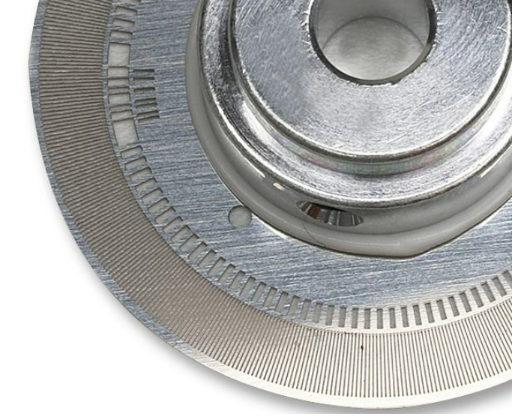

Combined with a emitter/detector that returns a signal when the wheel is passing light, you can count the number of segments as they pass and determine the wheel position. By taking the time derivative of that position information you can calculate velocity! 

Your motor has an encoder on it, but the resolution is limited.  We'll start by using the encoder module which has a high-resolution encoder and low friction bearings to measure the response of the motor with minimal effect on its dynamic response. 

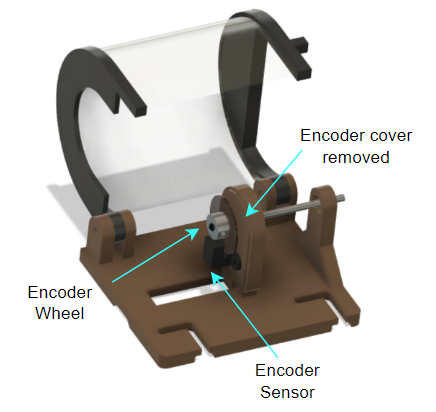

There are 500 segments/revolution for the wheel on the encoder module, but even that is not quite sufficient to give us the data resolution we'll need.  So to improve our resolution we'll use TWO sensors.  Review the animation below and watch what the output does when you position 2 sensors spaced 1.25x the distance between segments.



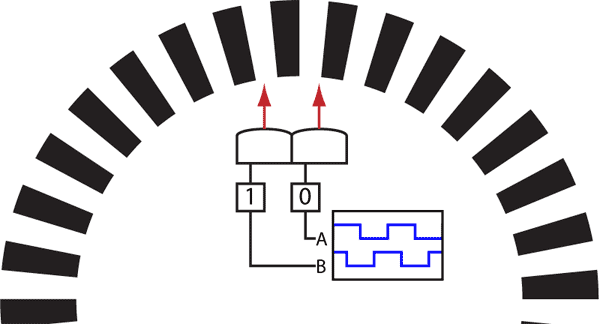


Did you notice there are several combinations of when sensor A and B are on/off for each segment on the wheel?  There are snapshots of this output shown below.  If you look at the repeating pattern, there are 4 unique combinations of the A and B signal per cycle.  That means that we can improve the the resolution of our angular position measurement to be **500\*4 = 2000 counts/revolution.**  It is because of this 4x increase that this method of reading an encoder is called the Quadrature method.

This method has another advantage.  It allows the direction of rotation to be determined.  Looking at the two patterns you might see there is a difference between the wheel turning clockwise or counterclockwise (anticlockwise).  That is, if the encoder channel B transitions to false after channels A and B were both true, the disk is moving clockwise. If channel A transitions to false after channels A and B were both true, the disk is moving counterclockwise (as shown in the animation above). 

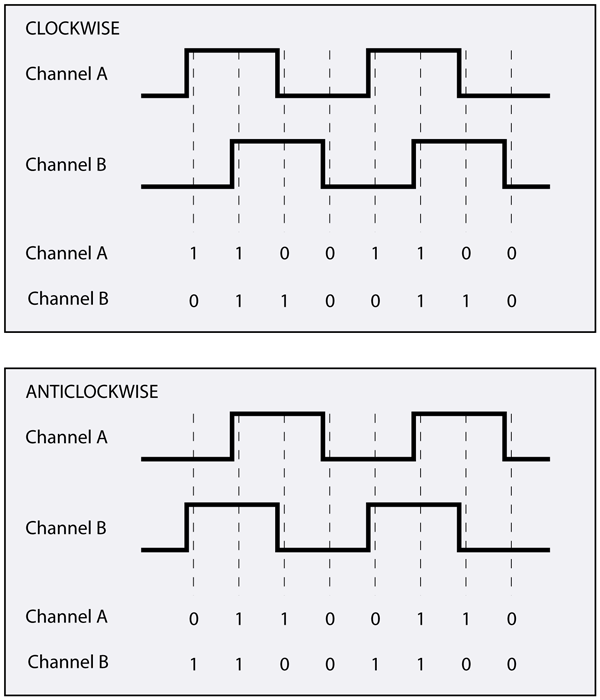
<font size = 2>http://www.creative-robotics.com</font>

  

## Reading the encoder module signal

Remove your gate module and install the encoder module using the two thumbscrews. **Notice that the extension on the motor inertial shield contacts the shield limit switch when it is fully closed.** Use a "flex coupler" to attach the encoder module shaft and the motor shaft together.  Make sure to align the flat part of the "D" shaft with the sockets in the coupler.  If the shaft cannot be inserted all the way, you may need to use a small screwdriver to clear any errant PLA material blocking it.

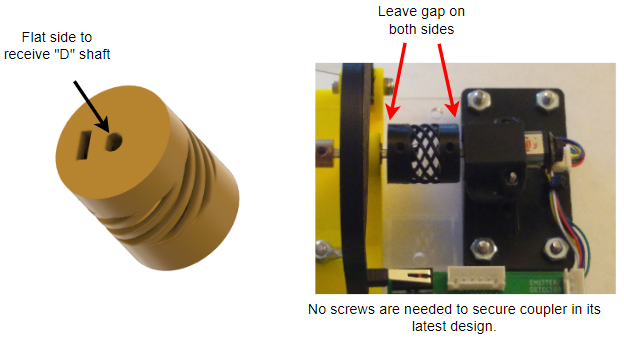


With the encoder module is installed on your workstation and the flex coupler attached to the motor and encoder shaft,  please plug the encoder cable into the **MOTOR1** socket (NOTE there is a channel on the bottom of the modules to allow the wires to pass UNDER it!). Confirm your motor is still connected to the **MOTOR2** socket.

The ME480FSM library includes classes that allow you to read the signals from the encoders plugged into MOTOR 1 and MOTOR 2.  Open the [ME480FSM library documentation](https://sabatind.github.io/ME480_Resources/Implementation_Resources/Arduino_Resource.html#Reading-a-Library's-Documentation) and take a look at the `FSMEncoder` encoder classes (`FSMEncoder1` reads the signals from the MOTOR 1 socket and `FSMEncoder2` reads from the MOTOR 2 socket).   

Write a simple Arduino code that reads the encoder counts from the intertia encoder using the Encoder1 class.  

***Run the program, and with the motor unpowered, rotate the encoder disk at the end of the motor gently by hand and see the change in the counter value in the serial monitor. Does it match the 2000 counts you expected? If not, review the results with your instructor***

## Measuring motor speed

Now it's time to run your motor and measure its speed. You will first need to create an FSM that achieves the following specifications:

* When momentary BTN 1 is pressed and held, the motor spins in one direction. We will refer to this as _RUNNING_ mode.
* When BTN 1 is not pressed, the motor does not spin, but remains idle. This will be referred to as _IDLE_ mode.
* A fault is defined as a condition in which the encoder module safety guard limit switch is not closed (the safety shield has been lifted out of place) or the E-Stop button has been pressed. Refer to the [Hardware Resource](https://sabatind.github.io/ME480_Resources/Implementation_Resources/Hardware_Resource.html#Workstation-Arduino-Mega-Pin-Mapping) to find the pin number for the safety guard limit switch.
* A fault will cause the system to leave the current mode and enter _FAULT_ mode. In the _FAULT_ mode the motor is disconnected from power (i.e., relay is open).


Put your state transition diagram in the cell below.

YOUR ANSWER HERE
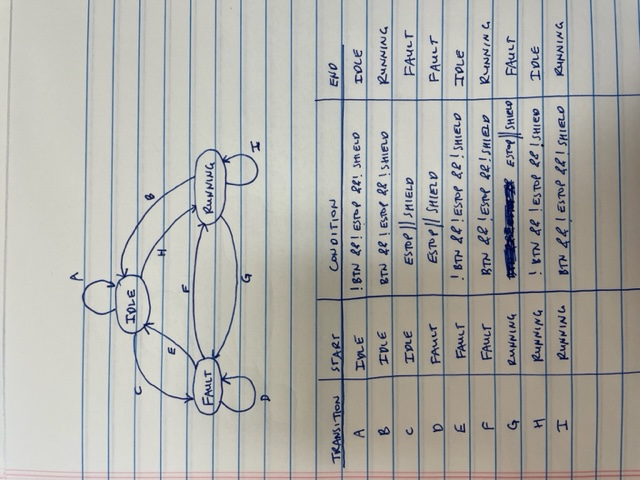

Put your transition table in the cell below.

YOUR ANSWER HERE

Implement your FSM as Arduino code. Add the encoder code from above into Block 1 of your FSM code.  Read the encoder and calculate the angular position of the motor shaft in radians and output that to the serial monitor.  Confirm the angular position is reasonable by moving the motor shaft in the _FAULT_ state by hand and comparing the calculated position and the actual shaft position

Now add a calculation for the speed of the motor output shaft in radians per second by using the first order numerical appoximation of the derivative every time through the loop.  Use the micros() function to calculate the elapsed time between measurements to improve the accuracy of the numerical approximation. 


***Place a PROPERLY FORMATTED copy of your Arduino code in the cell below.*** 

YOUR ANSWER HERE

***Run the code and set the motor voltage so it runs slow enough you can estimate the speed visually.  Display the speed in the serial monitor and confirm the calculated speed is comparable to your observation.***

Now, find the maximum speed of the motor in rad/sec and report that in the markdown cell below.

YOUR ANSWER HERE

#  *Model Development - Scoping:* Estimate the order of the system 

With this new measurement capability in place, you can use it to judge a reasonable order for the differential equation that might model your motor system.  To do this you will need to record the response of your system to a step input.  

Modify your code to enable the following capabilities:

----------------------------------------------
* When you enter the _RUNNING_ mode the motor will be sent an input voltage equal to an "inital voltage level" you set in your code using the analogWrite() function.
* When BTN 2 is held down, the motor input voltage will change from the initial voltage to the initial voltage + the step voltage (also set by you in your code). When BTN 2 is released the motor voltage will return to the initial voltage. This functionality can be added using an if-statement in Block 1 of your existing code -- you DO NOT need to create a new FSM.
* Use the [constrain()](https://sabatind.github.io/ME480_Resources/Implementation_Resources/Arduino_Resource.html#Common-Functions) function to ensure the voltage doesn't go below 0V or above 5V. 
* While in the _RUNNING_ state, use the serial monitor to output 4 columns: 

|            time           | motor Voltage | analogWrite() value | angular velocity |
|:-------------------------:|:-------------:|:-------------------:|:----------------:|
| (seconds with 4 decimals) |    (Volts)    |       (counts)      |     (rad/sec)    |
|                           |               |                     |                  |
    
* To maximize your sampling rate, set your baud rate to 115200 in setup using `Serial.begin()`

**Place a copy of your properly formatted Arduino code in the cell below.**


YOUR ANSWER HERE

Adjust the value of the _RUNNING 1_ mode voltage so the motor *just* achieves a speed where it runs "smoothly" and there are no obvious variations in angular velocity as it rotates. Set the step voltage to achieve a maximum voltage of 5V. 

Perform a step input experiment and save the step input data from the serial monitor to a text file.  Upload the file to your Lab_3 jupyter folder and read it into the Octave cell below. 

<b><span style="color:red;">NOTE:</span></b> In order to copy and paste data directly from the Arduino IDE Serial Monitor, you will need to use Arduino IDE v1.8.19 (Legacy Version) rather than v2.X.X. Simply go to the [Arduino IDE Site](https://www.arduino.cc/en/software) and install the <b><span style="color:red;">legacy version</span></b>. You should be able to open and run the code you have already created with the newer version, though only one version can be running at the same time.

***In a labeled plot with units, show the angular velocity vs. time***

In [ ]:
% YOUR CODE HERE
error('No Answer Given!')

# *Model Construction:* Parameter Estimation

***In the cell below, read in your experimental data, estimate the order of the system response, and fit the appropriate parameters of your model to the response(s) you recorded.**   
Your model has to allow for different input step sizes as we'll be changing the step in the first validation case.

**Label the graph axis and series and PRINT OUT your parameter names and values.***

In [ ]:
% YOUR CODE HERE
error('No Answer Given!')

# *Model Validation:* Change step size 

To test the linearity of your system, reduce the step size by approximately 1/2, **but keep the same initial voltage**. 

**Plot the motor angular velocity vs time for BOTH steps you recorded on the same graph**.  Include your model's PREDICTION for the smaller step.

Remember, this is a VALIDATION step.  You are not changing your model to match the new step data, you are comparing the model's prediction, given the same step input, to what you actually measured.

In [ ]:
% YOUR CODE HERE
error('No Answer Given!')

How does the model and the step compare?

YOUR ANSWER HERE

# *Model Validation:* Start from rest

Use your existing code to capture a step up in voltage from 0V using the same step size as the previous test.  

**Plot the motor angular velocity vs time on the same plot in the Octave cell below**  Plot the model's prediction on the same plot.

In [ ]:
% YOUR CODE HERE
error('No Answer Given!')

How does the model and the step compare?  What information can you draw from the comparison?

YOUR ANSWER HERE

# *Model Validation:* Low Resolution Sensor

In lab you have access to the high resolution encoder, but the motor also has a very compact encoder built into the motor.  An image of our encoder is shown below. The disk has six embbeded magnetic poles (3 north, 3 south) that can be sensed by the Hall effect sensors attached to the small circuit board. 

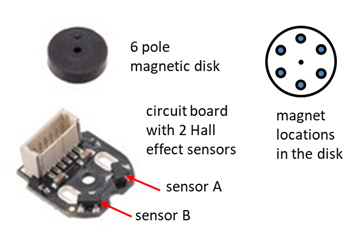

That is only 3 transitions per revolution!  BUT, the encoder does use quadrature encoding. The two Hall effect senors are 75° apart. That makes them 1.25 the distance between the magnets which are 60° apart. 

That still only means 3x4=12 transitions/revolution!  That is far too course for our use.  HOWEVER, the motor has a gear box and the output shaft is on the other side of the gearbox.  Although the motors are listed as 50:1 motor ratio, get the *precise gear box ratio* from the [manufacturer](https://www.pololu.com/product/3073/specs). 

Calculate the number of transitions/revolution you will get for the output shaft.  Show your calculations in the Octave cell below.

YOUR ANSWER HERE

# *Model Validation:* Coast Down

Now lets use both encoders to examine what happens when you turn OFF the motor and "coast-down" to 0 velocity.  

Modify your code to capture the encoder module data to also capture the motor encoder data using the [FSMEncoder2](https://sabatind.github.io/ME480_Resources/Implementation_Resources/Arduino_Resource.html#Reading-a-Library's-Documentation) class.  As you did with the high resolution encoder, calculate and output the velocity from the encoder signal (add it as a 5th column to your output).

Run the motor with a STEP DOWN input going from 5V to 0V capturing **BOTH** the high resolution and low resolution encoder signals.

***Put your properly formatted Arduino code in the cell below***

YOUR ANSWER HERE

***Plot the motor angular velocity from both encoders vs time in the cell below***

In [ ]:
% YOUR CODE HERE
error('No Answer Given!')

Note the behavior of the coast down.  Is it what you expected?  Even if it is not what you expected and nonlinear, we would still like to model it with a linear model if possible.  

Conceptually describe in words or with sketches how a linear model could capture this behavior.  If the system response IS nonlinear, then the model CAN have limitations over what conditions (or domain) it can be used to produce physical predictions.

YOUR ANSWER HERE

How did the velocity signal of the two encoders compare?

YOUR ANSWER HERE

# *Model Validation:* Encoder Resolution Limits

Your low resolution and high resolution data may look reasonably similar.  If that is the case, then why use a high resolution encoder?

Typically, you want to sample data as quickly as possible to get the highest temporal resolution.  However, as your sampling rate increaeses, the encoder will move less and less between samples.  At some sampling rate the encoder may not transition during some samples and then suddenly change states during others.  These step changes in encoder position will generate a VERY noisy derivative!

You workstation code doesn't usually run fast enough to see this effect, but so you can develop tools to handle this issue, we tuned the Lab 3 code to provide a fast enough response that the noise associated with the low resolution encoder can be seen.  

The data is stored in the "sample_data.txt" file included in your Lab_3 folder.

To make the low data more usable for fitting models (and eventually for closed loop control) you will filter it to reduce the high frequency noise, but retain the important system charateristics.

You might remember using a RC circuit in ME331 to "filter" high frequency signals.  The RC circuit was well represented by a first order system model.  If the the input had a time response that was relatively slow compared to the time constant of the RC circuit, the output would be similar to the input  

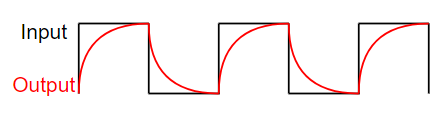

However, if the input had a time response that was close to time constant of the RC circuit, the output would not have the same amplitude of oscillation as the input. 

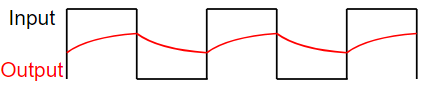

You will do the same thing here with a system of your own design that exists ONLY as a first order mathematical model.  The data is digital so we don't need a physical system to do the filtering.  Math alone is enough here.

Use your recent experience with numerical integration to simulate a first order system that will act as your digital filter.  Use the raw low-resolution data from the sample file as the INPUT and the OUTPUT will be a filtered velocity signal.  Select model parameters for your first order filter to ensure the it has a steady state gain of 1 as you don't want to change the magnitude of the raw low resolution signal, just reduce the noise. 

_Adjust your time constant emperically by-hand_ to best remove the high frequency noise of the low-resolution signal until it "reasonably" matches the system response captured by the high-resolution encoder.

**Use the cell below to read the sample data.  The file format is identical to what you used when you captured the high and low resolution encoder signal above.**

**Generate the filtered velocity signal and make ONE plot that shows the raw high resolution velocity, raw low resolution velocity, AS WELL AS the filtered low resolution velocity.**

In [ ]:
% YOUR CODE HERE
error('No Answer Given!')

How does the time constant of your filter compare to the time constant of the system?

YOUR ANSWER HERE